**Venkata Rachakonda - 100893970**

- M’ Corp is developing an application that will allow users to send messages and at the same time track security.
- This application will be powered by AI technology.
- The security will be composed of an encryption process and it is mandatory to follow this file-conversion >> “chyper-code.xlsx”
- It was requested that your team (max: 4 team members) develop the application and a ML model (python-based).
- A dataset was provided to support the training process (“file.xls”). The algorithm to be used is a team decision.
- The Data storage is mandatory (database or a file approach). Database(s): SQLite (free), MS SQL Server, ...
- The data generated by the application (user’s entry) will be used to test real scenarios. The records must ne extracted from the DB (“data-entry.csv”)
and feed the model to receive an automatic span or no-span detection.
- Your Jupyter notebook will be used to verify the records (mail messages) classification.
Deliverable #

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [16]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/AI Algorithms/Technical-Challenge 2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# read file into pandas using a relative path
sms = pd.read_excel(path+"file.xlsx")
sms.head()

,ID,EMAIL,email,label
0,1,1email@gmail.com,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,2,2email@gmail.com,martin a posted tassos papadopoulos the greek ...,0
2,3,3email@gmail.com,man threatens explosion in moscow thursday aug...,0
3,4,4email@gmail.com,klez the virus that won t die already the most...,0
4,5,5email@gmail.com,in adding cream to spaghetti carbonara which ...,0


In [18]:
sms = sms.rename(columns={'email': 'message'})

In [19]:
sms = sms[['message', 'label']]
sms['label_num'] = sms['label']
sms['label'] = sms['label_num'].replace({1: 'spam', 0: 'ham'})

# Exploratory Data Analysis (EDA)

In [20]:
sms[['label', 'message']].describe()

,label,message
count,2968,2967
unique,2,2840
top,ham,url URL date not supplied URL
freq,2468,10


In [21]:
sms.groupby('label').describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      2468.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam      500.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

We have `2648` ham message and `500` spam message

In [22]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,message,label,label_num
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,ham,0
1,martin a posted tassos papadopoulos the greek ...,ham,0
2,man threatens explosion in moscow thursday aug...,ham,0
3,klez the virus that won t die already the most...,ham,0
4,in adding cream to spaghetti carbonara which ...,ham,0


> As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of feature engineering. The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general.

In [23]:
print(sms['message'].dtype)


object


In [24]:
sms['message'] = sms['message'].astype(str)

In [25]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,message,label,label_num,message_len
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,ham,0,1522
1,martin a posted tassos papadopoulos the greek ...,ham,0,643
2,man threatens explosion in moscow thursday aug...,ham,0,1509
3,klez the virus that won t die already the most...,ham,0,1015
4,in adding cream to spaghetti carbonara which ...,ham,0,771


Text(0.5, 0, 'Message Length')

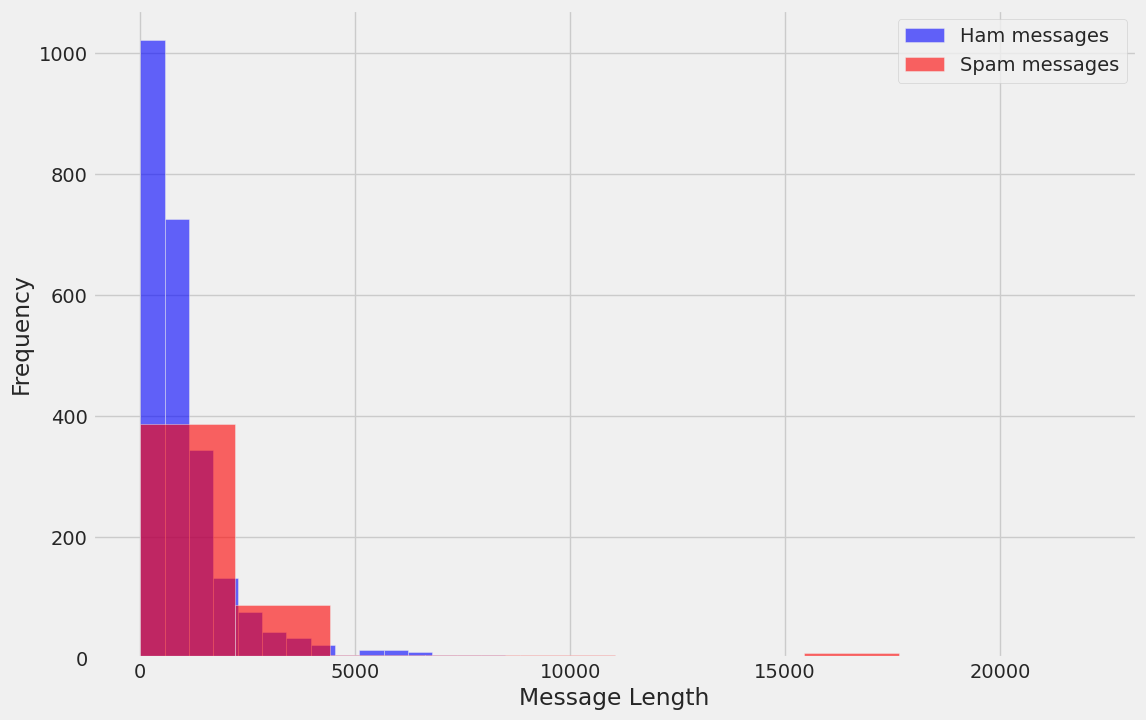

In [26]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

a trend that spam messages tend to have more characters.

In [27]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,2468.0,2468.000000
mean,0.0,1127.898298
std,0.0,1618.131386
min,0.0,5.000000
25%,0.0,356.000000
50%,0.0,716.500000
75%,0.0,1269.000000
max,0.0,19820.000000


In [28]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,500.0,500.000000
mean,1.0,1801.326000
std,0.0,2858.981401
min,1.0,1.000000
25%,1.0,560.000000
50%,1.0,956.500000
75%,1.0,1941.000000
max,1.0,22067.000000


> Spam has 22067 characters!

In [29]:
sms[sms.message_len == 22067].message.iloc[0]

'uncommon exotic pleasure botanicals feeling marvelous mood sensitive mood enhancing depressive regressive sweet treat forumulations for the pleasuring and well being of body mind spirit from the planet s foremost sensitive ethnobotanical cooperative exotic botanical resources product descriptions pricing and deep discounted intro offers information below seventh heaven sweet treat menu NUMBER shangrila zowie wowie tm gnarly sweet grass absolutely the most significant legal personal choice non cannabis non marijuana non tobacco smoking botanical on the planet NUMBER prosaka tm high ratio extracts in tablet form for calm balance serenity peaceful living NUMBER aqueous kathmandu tm happy drops personal choice enhanced sensitivity for non smokers tokers NUMBER sweet vjestika tm aphrodisia drops erotica intimacy sensitivity enhancement at its finest for men woman NUMBER gentle ferocity tm viripotent energization appetite suppression tablets without the inclusion of caffeine or mahaung herb

# Building the model

In [32]:
# read file into pandas using a relative path
path = '/content/drive/MyDrive/AI Algorithms/Technical-Challenge 2/'
sms = pd.read_excel(path+"file.xlsx")
sms.head()

,ID,EMAIL,email,label
0,1,1email@gmail.com,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,2,2email@gmail.com,martin a posted tassos papadopoulos the greek ...,0
2,3,3email@gmail.com,man threatens explosion in moscow thursday aug...,0
3,4,4email@gmail.com,klez the virus that won t die already the most...,0
4,5,5email@gmail.com,in adding cream to spaghetti carbonara which ...,0


In [33]:
sms = sms.rename(columns={'email': 'message'})

In [34]:
sms.message = sms.message.astype(str)

In [35]:
sms = sms[['message', 'label']]
sms['label_num'] = sms['label']
sms['label'] = sms['label_num'].replace({1: 'spam', 0: 'ham'})

<ipython-input-35-28646bc05d5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['label_num'] = sms['label']
<ipython-input-35-28646bc05d5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['label'] = sms['label_num'].replace({1: 'spam', 0: 'ham'})


In [36]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [37]:
sms['clean_msg'] = sms.message.apply(text_process)

In [38]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2968,)
(2968,)
(2226,)
(742,)
(2226,)
(742,)


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
# instantiate the vectorizer
vect = CountVectorizer()

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

with open(path+'vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (2226, 25327)
<class 'scipy.sparse._csr.csr_matrix'> (742, 25327)


### Logistic Regression

In [76]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 79.4 ms, sys: 60.7 ms, total: 140 ms
Wall time: 88 ms


LogisticRegression(solver='liblinear')

In [87]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob[0:10]

array([4.44761500e-03, 3.86739756e-03, 7.41013739e-03, 3.88736986e-05,
       9.60438269e-01, 9.89329690e-01, 1.08071485e-03, 2.05585624e-05,
       4.27531240e-02, 6.52928615e-07])

In [86]:
y_pred_class[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [79]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9824797843665768
=======Confision Matrix===========
[[603   1]
 [ 12 126]]
=======ROC AUC Score===========
0.9923217199347345


### MultinomialNB

In [80]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [81]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 5.07 ms, sys: 0 ns, total: 5.07 ms
Wall time: 9.1 ms


MultinomialNB()

In [82]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [85]:
y_pred_class[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [84]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9824797843665768
=======Confision Matrix===========
[[603   1]
 [ 12 126]]
=======ROC AUC Score===========
0.9923217199347345


# Testing the model

In [43]:
with open(path+'model.pkl', 'wb') as f:
    pickle.dump(nb, f)

# Testing the final model

In [58]:
import psycopg2

def create_connection():
    conn = psycopg2.connect(
        host="assignmentvenkata.postgres.database.azure.com",
        port="5432",
        dbname="db.user",
        user="venkata",
        password="Sai@121993"
    )
    return conn

conn =create_connection()

In [72]:

def get_all_mails():
    try:
          # Execute your SQL statement
          conn.commit()
          qry = "SELECT * FROM TB_MAIL"
          df = pd.read_sql_query(qry, conn)
          df.to_csv(path + 'data-entry.csv')
    
    except Exception as e:
        # Handle all other exceptions here
        conn.rollback()
        print(f"Error: {e}")
        return None

In [73]:
get_all_mails()

<ipython-input-72-9e0e1ea91c2e>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(qry, conn)


In [74]:
df = pd.read_csv(path + 'data-entry.csv')

In [75]:
df

,Unnamed: 0,mail_id,user_id,login,mail_content,to_login,spam
0,0,1,1,sai@gmail.com,djfalsjd,venkat@gmail.com,1
1,1,2,1,sai@gmail.com,djfalsjdsldf;asdf;laks;fasdl,venkat@gmail.com,1
2,2,3,1,sai@gmail.com,dajsl,venkat@gmail.com,0
3,3,4,1,sai@gmail.com,kjdalskjflkasjlfkjaslkfjalsjflasjdlkfajsd,venkat@gmail.com,0
4,4,5,1,sai@gmail.com,NUMBER fight the risk of cancer URL NUMBER sli...,venkat@gmail.com,1
